# Ploting the mobility profiles

For $\mu_{eff}$ and $\mu_{PIC}$.

The Data is saved once in a txt file

## Importing stuffs

In [1]:
#imports libs and data
%matplotlib inline
import pickle, json, numpy as np, matplotlib as mpl,  matplotlib.pyplot as plt, warnings
warnings.filterwarnings("ignore")
import Classes.LPPic_fields as fl

import matplotlib as mpl
Paper_style = json.load(open("Paperstyle.json",'r'))
mpl.style.use(Paper_style)

from scipy.ndimage.filters import gaussian_filter1d as smooth

qe = 1.6021766E-19
me =  9.109E-31 
mi = 219.6E-27
eps0 = 8.854187817e-12

savepath = "../images/"

sigma_0 = 0.5
sigma_max= 2.9

In [2]:
root = "/run/media/tavant/DATA2/Xe_Chibre/"
names = ['test_65', 'test_55', 'test_61', 'test_59', ]
paths = [root + n+'/' for n in names]

# Load data and plot

In [3]:
Mobs = pickle.load(open("Mobility_profile.dat","rb"))
Prof_mob0, Prof_mob1, Prof_mob2, Prof_mob3 = Mobs

## PIC Mobility

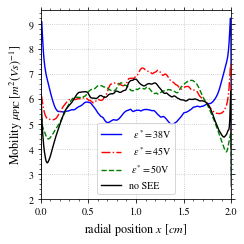

In [4]:
#define physical values from simulation
delta_X = 2.0E-3
fig = plt.figure(figsize=(3.5,3.5))

#Creating the R_axis
R_axis = np.arange(np.shape(Prof_mob1)[0])*delta_X

plt.plot(R_axis,abs(Prof_mob2),label='  $\epsilon^{*}=38$V', linestyle='-',color='b',linewidth=1.4)
plt.plot(R_axis,abs(Prof_mob1),label='  $\epsilon^{*}=45$V', linestyle='-.',color='r',linewidth=1.4)
plt.plot(R_axis,abs(Prof_mob3),label=' $\epsilon^{*}=50$V', linestyle='--',color='g',linewidth=1.4)
plt.plot(R_axis,abs(Prof_mob0),label='no SEE', linestyle='-',color='k',linewidth=1.4)

plt.ylim(ymin = 2)
plt.xlim(0,2)

plt.xlabel("radial position $x$ [$cm$]")
plt.ylabel(r"Mobility $\mu_{\rm PIC} \/ [m^2(Vs)^{-1}$]")
plt.legend(loc="best")
plt.grid(True)

plt.savefig("../images/Mobility_SEE")

## Effective Profile

In [5]:
###################################################
#loading the different profiles

Profile_1 = np.loadtxt('images_article_2//I_mu_eff')
Profile_2 = np.loadtxt('images_article_2//II_mu_eff')
Profile_3 = np.loadtxt('images_article_2//III_mu_eff')
Profile_no= np.loadtxt('images_article_2//no_mu_eff')

R_axis_1 = np.loadtxt('images_article_2//I_R_axis')
R_axis_2 = np.loadtxt('images_article_2//II_R_axis')
R_axis_3 = np.loadtxt('images_article_2//III_R_axis')
R_axis_no= np.loadtxt('images_article_2//no_R_axis')

###################################################

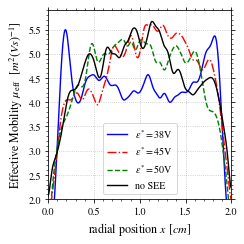

In [6]:
#plot
fig = plt.figure(figsize=(3.5,3.5))
sig = 13
plt.plot(R_axis_1 ,smooth(abs(Profile_1), sig ) , label='$\epsilon^{*}=38$V', linestyle='-',color='b',linewidth=1.4)
plt.plot(R_axis_2 ,smooth(abs(Profile_2), sig  ) , label='$\epsilon^{*}=45$V', linestyle='-.',color='r',linewidth=1.4)
plt.plot(R_axis_3 ,smooth(abs(Profile_3), sig ), label='$\epsilon^{*}=50$V', linestyle='--',color='g',linewidth=1.4)
plt.plot(R_axis_no,smooth(abs(Profile_no), sig ), label='no SEE', linestyle='-',color='k',linewidth=1.4)

plt.xlabel("radial position $x$ [$cm$]")
plt.ylabel(r"Effective Mobility $\mu_{\rm eff}$  [$m^2(Vs)^{-1}$]")
plt.legend(loc="best")
plt.grid(True)
plt.ylim(ymin = 2)
plt.xlim(0,2)


plt.savefig("../images/Effective_Mobility_SEE")

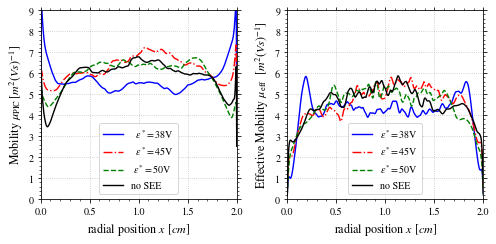

In [9]:
fig = plt.figure(figsize=(7,3.5))

#Creating the R_axis
R_axis = np.arange(np.shape(Prof_mob1)[0])*delta_X

plt.subplot(121)
plt.plot(R_axis,abs(Prof_mob2),label='  $\epsilon^{*}=38$V', linestyle='-',color='b',linewidth=1.4)
plt.plot(R_axis,abs(Prof_mob1),label='  $\epsilon^{*}=45$V', linestyle='-.',color='r',linewidth=1.4)
plt.plot(R_axis,abs(Prof_mob3),label=' $\epsilon^{*}=50$V', linestyle='--',color='g',linewidth=1.4)
plt.plot(R_axis,abs(Prof_mob0),label='no SEE', linestyle='-',color='k',linewidth=1.4)

plt.ylim(ymin = 0, ymax=9)
plt.xlim(0,2)

plt.xlabel("radial position $x$ [$cm$]")
plt.ylabel(r"Mobility $\mu_{\rm PIC} \/ [m^2(Vs)^{-1}$]")
plt.legend(loc=8)
plt.grid(True)

plt.subplot(122)
sig = 1
plt.plot(R_axis_1 ,smooth(abs(Profile_1), sig ) , label='$\epsilon^{*}=38$V', linestyle='-',color='b',linewidth=1.4)
plt.plot(R_axis_2 ,smooth(abs(Profile_2), sig  ) , label='$\epsilon^{*}=45$V', linestyle='-.',color='r',linewidth=1.4)
plt.plot(R_axis_3 ,smooth(abs(Profile_3), sig ), label='$\epsilon^{*}=50$V', linestyle='--',color='g',linewidth=1.4)
plt.plot(R_axis_no,smooth(abs(Profile_no), sig ), label='no SEE', linestyle='-',color='k',linewidth=1.4)

plt.xlabel("radial position $x$ [$cm$]")
plt.ylabel(r"Effective Mobility $\mu_{\rm eff}$  [$m^2(Vs)^{-1}$]")
plt.legend(loc="best")
plt.grid(True)
plt.ylim(ymin = 0, ymax = 9)
plt.xlim(0,2)

plt.savefig("../images/both_Mobility_SEE")

# Loading data from file !

Use it if the dumped pickle doesn't work

In [27]:
def return_mean_key(path,key):
    """this is for the old data :/
    """
    
    import glob
    import h5py as hp

    ###################################################
    #No SEE
    #getting the list of my files in a sorted way
    files = glob.glob(path +'data/tabgrid*')
    files.sort()
    
    #getting the number of elements in the list
    n = len(files)
    Mobs = np.zeros(1001)
    
    #Unpacking the shit from all the files
    for i, fichier in enumerate(files):
        #opening the files through hdf5 and getting the keys
        fichier = hp.File(fichier,'r')

        #attention on fait avec la mobilité là !
        temp = fichier.get(key)[()]
        Mobs += temp.mean(axis = 1)
        print(f"\r {i} ",end="")
    print("\r             ")
    return Mobs/(i+1)

In [29]:
#Extract the data from the runs
Mobs = [[] for n in names]

for i,(path) in enumerate(paths):
    #print(path)
    Mobs[i] = return_mean_key(path,'Mob')
    
pickle.dump(Mobs,open("Mobility_profile.dat","wb"))